<a href="https://colab.research.google.com/github/mifuha/MLpractice/blob/main/ML%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [107]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/mifuha/MLpractice/main/recruitment_decision_tree.csv')
df.head()



,Serial_no,Gender,Python_exp,Experience_Years,Education,Internship,Score,Salary * 10E4,Offer_History,Location,Recruitment_Status
0,1,Male,Yes,0.0,Graduate,No,5139,0.0,1.0,Urban,Y
1,2,Male,No,1.0,Graduate,No,4583,128.0,1.0,Rural,N
2,3,Male,No,0.0,Graduate,Yes,3000,66.0,1.0,Urban,Y
3,4,Male,No,0.0,Not Graduate,No,2583,120.0,1.0,Urban,Y
4,5,Male,Yes,0.0,Graduate,No,6000,141.0,1.0,Urban,Y


### Q. Define the problem domain

In [108]:
# Useful for analysing and predicting recruitment outcomes on the basis of different variables 

#"Recruitment_Status", which indicates  a classificaion problem (if a person has been hired or not) is going to be our label column. 
#We are trying different ML models to see the best fit for predicting the outcome (Y/N) on the basis of the most relevant featueres or indepndant variables. 


### Q. Identify candidate questions for your machine learning project

In [109]:

#The dataset includes a mix of discrete and continuous numerical values as well as categorical values. That is why before the training
#we will need to prepare and clean our data, do some One-hot or label encoding and potinetially remove any numerical outliers or classify them into subgroups.


In [110]:
df.shape

(614, 11)

In [111]:
df.columns

Index(['Serial_no', 'Gender', 'Python_exp', 'Experience_Years', 'Education',
       'Internship', 'Score', 'Salary * 10E4', 'Offer_History', 'Location',
       'Recruitment_Status'],
      dtype='object')

In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial_no,614.0,307.500000,177.390811,1.0,154.25,307.5,460.75,614.0
Experience_Years,599.0,0.762938,1.015216,0.0,0.00,0.0,2.00,3.0
Score,614.0,5402.302932,6109.024398,150.0,2877.50,3812.5,5771.50,81000.0
Salary * 10E4,593.0,146.165261,85.726110,0.0,100.00,128.0,168.00,700.0
Offer_History,564.0,0.842199,0.364878,0.0,1.00,1.0,1.00,1.0


### Q. Generate a descriptive statistics report for the columns in your dataset

In [113]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Serial_no           614 non-null    int64  
 1   Gender              601 non-null    object 
 2   Python_exp          611 non-null    object 
 3   Experience_Years    599 non-null    float64
 4   Education           614 non-null    object 
 5   Internship          582 non-null    object 
 6   Score               614 non-null    int64  
 7   Salary * 10E4       593 non-null    float64
 8   Offer_History       564 non-null    float64
 9   Location            614 non-null    object 
 10  Recruitment_Status  614 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 52.9+ KB


In [115]:
df.isnull().sum()
#a few missing values indentified, which will be replaced with in the next step according to different criteria. 

Serial_no              0
Gender                13
Python_exp             3
Experience_Years      15
Education              0
Internship            32
Score                  0
Salary * 10E4         21
Offer_History         50
Location               0
Recruitment_Status     0
dtype: int64

In [116]:
#Replacing the missing values before encoding categorical values
df['Gender'].fillna('Female', inplace=True)

df['Experience_Years'].fillna(0, inplace=True)

df['Python_exp'].fillna(0, inplace=True)

df['Offer_History'].fillna(1, inplace=True)

df['Internship'].fillna(1, inplace=True)

df['Salary * 10E4'].fillna(np.mean(df['Salary * 10E4']), inplace=True)




In [117]:
df.isnull().sum()

Serial_no             0
Gender                0
Python_exp            0
Experience_Years      0
Education             0
Internship            0
Score                 0
Salary * 10E4         0
Offer_History         0
Location              0
Recruitment_Status    0
dtype: int64

In [118]:
df.drop(['Serial_no'], axis=1, inplace=True)

Q. Is there any correlation in the data? How would you decide which columns to keep?

In [119]:
#Before looking at the correlations I need to preparea clean the data 
#Replace yes/no values with binary numerical values

df['Python_exp'].value_counts()
df['Python_exp'] = df['Python_exp'].apply(lambda x: 1 if x == "Yes" else 0)



In [120]:
#replace categorical values with binary numerical values
df['Education'].value_counts()
df['Education'] = df['Education'].apply(lambda x: 1 if x == "Graduate" else 0)

In [121]:
#replace categorical values with binary numerical values
df['Internship'] = df['Internship'].apply(lambda x: 1 if x == "Yes" else 0)

In [122]:
#replace categorical values with binary numerical values
df['Gender'] = df['Gender'].apply(lambda x: 1 if x== "Male" else 0)

In [123]:

#Performing dummies encoding for categorical value 'Location'.

dummies = pd.get_dummies(df[['Location']])
df = pd.concat([df, dummies], axis=1)


In [124]:
df

,Gender,Python_exp,Experience_Years,Education,Internship,Score,Salary * 10E4,Offer_History,Location,Recruitment_Status,Location_Rural,Location_Semiurban,Location_Urban
0,1,1,0.0,1,0,5139,0.0,1.0,Urban,Y,0,0,1
1,1,0,1.0,1,0,4583,128.0,1.0,Rural,N,1,0,0
2,1,0,0.0,1,1,3000,66.0,1.0,Urban,Y,0,0,1
3,1,0,0.0,0,0,2583,120.0,1.0,Urban,Y,0,0,1
4,1,1,0.0,1,0,6000,141.0,1.0,Urban,Y,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,0.0,1,0,2900,71.0,1.0,Rural,Y,1,0,0
610,1,0,3.0,1,0,4106,40.0,1.0,Rural,Y,1,0,0
611,1,0,1.0,1,0,8072,253.0,1.0,Urban,Y,0,0,1
612,1,0,2.0,1,0,7583,187.0,1.0,Urban,Y,0,0,1


In [125]:


df.drop('Location', axis=1, inplace=True)

In [126]:
#renaming the column 

df = df.rename(columns={'Salary * 10E4': 'Salary'})





In [127]:
# encdoing the label
df['Recruitment_Status'] = df['Recruitment_Status'].apply(lambda x: 0 if x=="N" else 1)

In [128]:
df['Experience_Years'].value_counts()

0.0    360
1.0    102
2.0    101
3.0     51
Name: Experience_Years, dtype: int64

In [129]:
#Correlations 


In [130]:


df.corr()

,Gender,Python_exp,Experience_Years,Education,Internship,Score,Salary,Offer_History,Recruitment_Status,Location_Rural,Location_Semiurban,Location_Urban
Gender,1.000000,-0.336818,0.148500,-0.061497,-0.027421,0.013838,0.063002,0.021612,0.025407,0.075128,-0.113069,0.044109
Python_exp,-0.336818,1.000000,-0.334216,0.012304,-0.004489,-0.051968,-0.150653,-0.010938,-0.091478,0.006805,-0.005845,-0.000546
Experience_Years,0.148500,-0.334216,1.000000,-0.055752,0.056798,0.118342,0.164792,-0.040160,0.010118,-0.000816,0.001924,-0.001198
Education,-0.061497,0.012304,-0.055752,1.000000,0.010383,0.140661,0.165118,0.073658,0.085884,-0.077520,0.039410,0.034279
Internship,-0.027421,-0.004489,0.056798,0.010383,1.000000,0.127254,0.116086,-0.001550,-0.003700,0.022065,0.008710,-0.030338
Score,0.013838,-0.051968,0.118342,0.140661,0.127254,1.000000,0.564352,-0.018693,-0.004837,0.015951,-0.014098,-0.000868
Salary,0.063002,-0.150653,0.164792,0.165118,0.116086,0.564352,1.000000,-0.002580,-0.038191,0.044890,-0.006008,-0.037216
Offer_History,0.021612,-0.010938,-0.040160,0.073658,-0.001550,-0.018693,-0.002580,1.000000,0.540556,-0.020906,0.035976,-0.016934
Recruitment_Status,0.025407,-0.091478,0.010118,0.085884,-0.003700,-0.004837,-0.038191,0.540556,1.000000,-0.100694,0.136540,-0.043621
Location_Rural,0.075128,0.006805,-0.000816,-0.077520,0.022065,0.015951,0.044890,-0.020906,-0.100694,1.000000,-0.501646,-0.449168


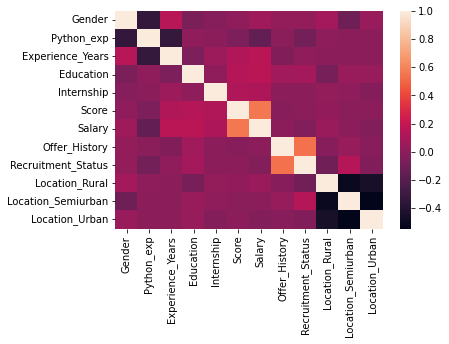

In [131]:
import seaborn as sns
corr = df.corr()

plt.figure()
sns.heatmap(corr)
plt.show()

#Of the basis of the correlation heatmap we can see that with the exception of 'Offer_History' there is no strong correlation with our class label, 
#As there seem to be some indirectt correltations with the label through some of the correltations between the features that seem to be moderatly or weakly related to the label, I decided to keep
#all the features for our ML training. 



Q. Is there any imbalance in the label
?

In [132]:
#No action need as the label is a binary value

Q. Are there any outliers in the dataset? What do you do with them?

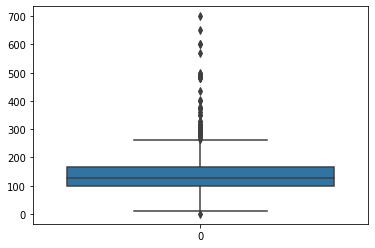

In [133]:
#Using boxplot to identify the outliers
#I have tried to split the data into 5 categories as to neturalise the outliers however this gave me a lower accuracy in the best performing model, so in the end I did not process the outliers. 

#print(df['Salary'].median())
sns.boxplot(data=df['Salary'])



def categories(num):
  if num < 20:
    return 0
  elif num < 100:
    return 1
  elif num < 200:
    return 2
  elif num < 300:
    return 3
  else:
    return 4
  
#df['Salary'] = df['Salary'].apply(lambda x: categories(x))

#data = np.array(df['Salary'])
#print(data)
#z = stats.zscore(data)









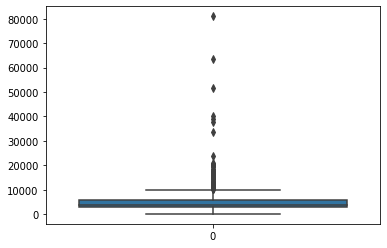

In [134]:
# trying a similar classification as above.It did not change the accuracy to a great deal (there was a slight discrease in some models and slight increase in others)
#so i decided to leave the feature as it is. I wanted to process the outliers with the Z-score method, but I was running out of time.
sns.boxplot(data=df['Score'])


def categories(num):
  if num < 1000:
    return 0
  elif num < 3000:
    return 1
  elif num < 7000:
    return 2
  elif num < 12000:
    return 3
  else:
    return 4
  
#df['Score'] = df['Score'].apply(lambda x: categories(x))
#data = np.array(df['Score'])
#print(data)
#z = stats.zscore(data)
#print(z)



Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

In [135]:
# I have already processed the feuateres above, using lambda functions and panda dummies.

Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [136]:
#Spliting the data for training and scoring. 
#Trying out different configurations. The outcome is highly dependant on one variable 'Offer_History', next in importance is the 'location' where as the other features have only a slight impact on the general score.

features = ['Gender',	'Python_exp',	'Experience_Years',	'Education',	'Internship',	'Salary', 'Score',	'Offer_History',	'Location_Rural',	'Location_Urban','Location_Semiurban']
#features = ['Score',	'Offer_History', 'Location_Rural',	'Location_Urban','Location_Semiurban']
#features = ['Experience_Years',	'Education','Salary','Location_Rural',	'Location_Urban','Location_Semiurban']
x = df.loc[:, features]
y = df.loc[:, 'Recruitment_Status']
x.dropna(inplace=True)
y = y.iloc[x.index]
print(x.shape)
print(y.shape)
x.head()

(614, 11)
(614,)


,Gender,Python_exp,Experience_Years,Education,Internship,Salary,Score,Offer_History,Location_Rural,Location_Urban,Location_Semiurban
0,1,1,0.0,1,0,0.0,5139,1.0,0,1,0
1,1,0,1.0,1,0,128.0,4583,1.0,1,0,0
2,1,0,0.0,1,1,66.0,3000,1.0,0,1,0
3,1,0,0.0,0,0,120.0,2583,1.0,0,1,0
4,1,1,0.0,1,0,141.0,6000,1.0,0,1,0


In [137]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y,test_size=0.2, random_state=42)

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [138]:
#After spliting the data we are trying out dfferent ML models and assesing their accuracy and AUC (AUC is relevant here as it is ametric utilizes probabilities of class prediction)

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


ntree1, ntree2 = 60,120
from sklearn.metrics import accuracy_score
from sklearn import model_selection
for algo in [RandomForestClassifier(n_estimators=ntree1), RandomForestClassifier(n_estimators=ntree2), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), GradientBoostingClassifier(n_estimators=80, random_state=2)]:
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  print(f'The accuracy score for {model}: {round(accuracy_score(predictions, ytest),2)}')
  results = model_selection.cross_val_score(model,x , y, scoring='roc_auc')
  print(f'The AUC for the same model: {round(results.mean(),2)}\n')


The accuracy score for RandomForestClassifier(n_estimators=60): 0.75
The AUC for the same model: 0.72

The accuracy score for RandomForestClassifier(n_estimators=120): 0.77
The AUC for the same model: 0.74

The accuracy score for GaussianNB(): 0.79
The AUC for the same model: 0.75

The accuracy score for DecisionTreeClassifier(): 0.69
The AUC for the same model: 0.66

The accuracy score for KNeighborsClassifier(): 0.64
The AUC for the same model: 0.51

The accuracy score for GradientBoostingClassifier(n_estimators=80, random_state=2): 0.78
The AUC for the same model: 0.71



# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [139]:
#In the end I have identified the Gaussian Naive Bayes model as best the performing model(according to accuracy and AUC measuers) and so the most suitable model to address our question'
#The model shows relatively high confindece of predicting the outcome on the basis of the provided features. 

final_model = GaussianNB()
final_model.fit(xtrain,ytrain)
p = final_model.predict(xtest)
print(f'The accuracy score for {model}: {round(accuracy_score(predictions, ytest),2)}')
results = model_selection.cross_val_score(model,x , y, scoring='roc_auc')
print(f'The AUC for the same model: {round(results.mean(),2)}\n')



The accuracy score for GradientBoostingClassifier(n_estimators=80, random_state=2): 0.78
The AUC for the same model: 0.71



# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [140]:
# EXPORT your model and upload to azure
# deploy to Azure Container Instance
# after 20-30 mins, consume tab will appear in your ENDPOINT
# and then paste the PYTHON code below!